# StandradScaler  And Normalization

In [281]:
import numpy as np
import pandas as pd


In [282]:
n= pd.read_csv("C:\\Users\\HP\\Downloads\\Social_Network_Ads.csv")
w= pd.read_csv("C:\\Users\\HP\\Downloads\\wine_data.csv")

In [283]:
n

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [284]:
n=n.drop(["User ID","Gender"],axis=1)
n


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [285]:
n.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [286]:
n.shape

(400, 3)

In [287]:
n.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [288]:
n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [289]:
n.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [292]:
n.duplicated().sum()

33

In [304]:
# Duplicated Data Remove
n.drop_duplicates(inplace=True)

In [305]:
n.duplicated().sum()

0

In [306]:
x = n.drop(["Purchased"],axis=1)
y = n["Purchased"]

In [307]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [308]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 367, dtype: int64

In [309]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)



In [311]:
x_train

,Age,EstimatedSalary
370,60,46000
213,35,58000
78,28,87000
88,26,81000
385,56,60000
...,...,...
73,33,113000
111,37,71000
288,41,79000
377,42,53000


In [312]:
x_test

,Age,EstimatedSalary
204,58,101000
34,27,90000
15,29,80000
334,57,60000
59,32,117000
...,...,...
85,31,118000
99,28,37000
203,41,71000
379,58,23000


In [316]:
# StandardScaler Karna
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sf = sc.fit_transform(x_train)
st = sc.transform(x_test)

In [317]:
# DataFreme Me Convert 
sf = pd.DataFrame(sf,columns=x_train.columns) 
st = pd.DataFrame(st,columns=x_test.columns)

In [318]:
sf

,Age,EstimatedSalary
0,2.114414,-0.712833
1,-0.240830,-0.369830
2,-0.900298,0.459093
3,-1.088717,0.287591
4,1.737575,-0.312663
...,...,...
288,-0.429249,1.202265
289,-0.052410,0.001756
290,0.324429,0.230424
291,0.418638,-0.512748


In [319]:
st

,Age,EstimatedSalary
0,1.925994,0.859262
1,-0.994508,0.544843
2,-0.806088,0.259008
3,1.831785,-0.312663
4,-0.523459,1.316599
...,...,...
69,-0.617669,1.345182
70,-0.900298,-0.970084
71,0.324429,0.001756
72,1.925994,-1.370254


In [320]:
# Main Data
x_train

,Age,EstimatedSalary
370,60,46000
213,35,58000
78,28,87000
88,26,81000
385,56,60000
...,...,...
73,33,113000
111,37,71000
288,41,79000
377,42,53000


In [321]:
# Scaled Data
sf

,Age,EstimatedSalary
0,2.114414,-0.712833
1,-0.240830,-0.369830
2,-0.900298,0.459093
3,-1.088717,0.287591
4,1.737575,-0.312663
...,...,...
288,-0.429249,1.202265
289,-0.052410,0.001756
290,0.324429,0.230424
291,0.418638,-0.512748


In [322]:
# Main DataSet
x_test


,Age,EstimatedSalary
204,58,101000
34,27,90000
15,29,80000
334,57,60000
59,32,117000
...,...,...
85,31,118000
99,28,37000
203,41,71000
379,58,23000


In [323]:
# Scaled DataSet
st

,Age,EstimatedSalary
0,1.925994,0.859262
1,-0.994508,0.544843
2,-0.806088,0.259008
3,1.831785,-0.312663
4,-0.523459,1.316599
...,...,...
69,-0.617669,1.345182
70,-0.900298,-0.970084
71,0.324429,0.001756
72,1.925994,-1.370254


In [324]:
# Unscaled DataSet
n.describe()

,Age,EstimatedSalary,Purchased
count,367.000000,367.000000,367.000000
mean,37.722071,70719.346049,0.376022
std,10.681383,34772.173908,0.485047
min,18.000000,15000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,71000.000000,0.000000
75%,46.000000,89000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [325]:
# scaled DataSet ko Round up 
np.round(sf.describe())

,Age,EstimatedSalary
count,293.0,293.0
mean,0.0,-0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


In [327]:
np.round(sf.describe(),1)

,Age,EstimatedSalary
count,293.0,293.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.8,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.3


In [328]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\AppData\Local\Temp\ipykernel_4560\1383155506.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n["Age"])


<Axes: xlabel='Age', ylabel='Density'>

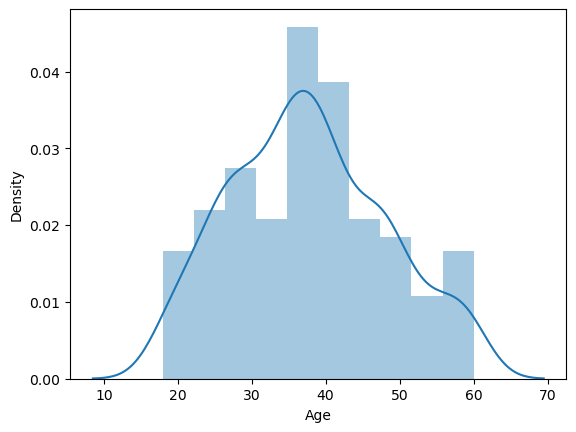

In [228]:
sns.distplot(n["Age"])


C:\Users\HP\AppData\Local\Temp\ipykernel_4560\4192164584.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n["EstimatedSalary"])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

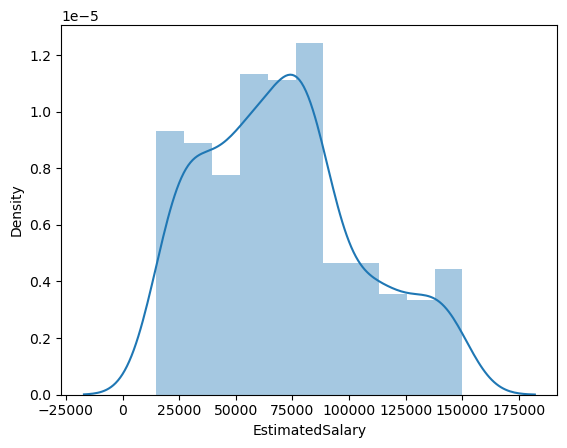

In [329]:
sns.distplot(n["EstimatedSalary"])

<Axes: >

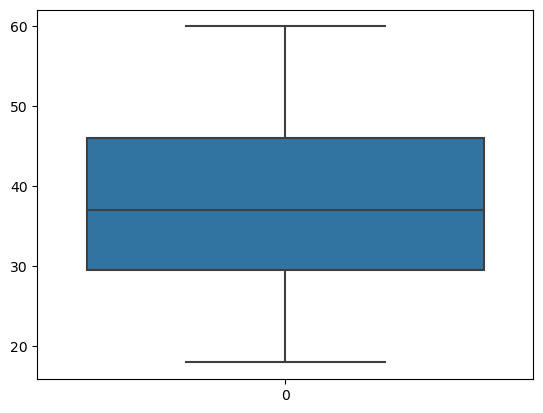

In [331]:
sns.boxplot(n["Age"])

<Axes: >

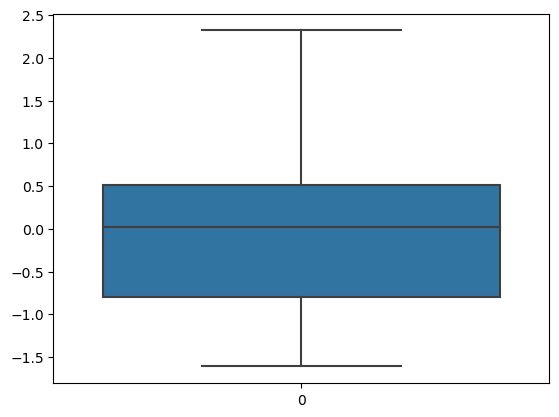

In [233]:
sns.boxplot(sf["EstimatedSalary"])

In [234]:
# Before Scaled Daat
n.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [333]:
# After Scaled Data
np.round(sf.describe())

,Age,EstimatedSalary
count,293.0,293.0
mean,0.0,-0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


<Axes: xlabel='Age', ylabel='Density'>

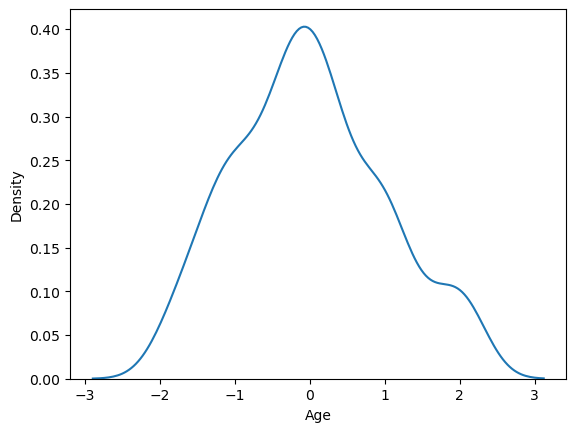

In [237]:
sns.kdeplot(sf["Age"])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

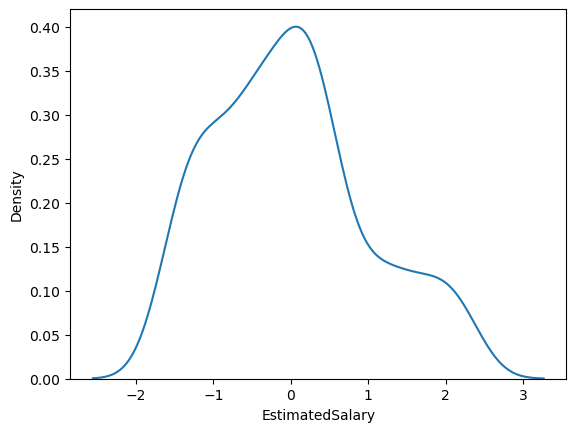

In [239]:
sns.kdeplot(sf["EstimatedSalary"])

# --------------------------Normalization---------------- 

# MinmaxSxaler

In [240]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
mf = scaler.fit_transform(x_train)
mt = scaler.transform(x_test)


In [241]:
# Before MinMax Scaler
n.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [242]:
mf = pd.DataFrame(mf,columns=x_train.columns)
mt = pd.DataFrame(mt,columns=x_test.columns)

In [334]:
# After MinMax Sacler
mf.describe()

,Age,EstimatedSalary
count,320.000000,320.000000
mean,0.473140,0.409491
std,0.243036,0.255041
min,0.000000,0.000000
25%,0.285714,0.207407
50%,0.452381,0.414815
75%,0.642857,0.540741
max,1.000000,1.000000


In [244]:
mt

,Age,EstimatedSalary
0,0.666667,0.051852
1,0.976190,0.540741
2,0.238095,0.214815
3,0.714286,0.600000
4,0.261905,0.096296
...,...,...
75,0.404762,0.259259
76,0.904762,0.874074
77,0.857143,0.081481
78,0.404762,0.237037


C:\Users\HP\AppData\Local\Temp\ipykernel_4560\2859824865.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sf["Age"])


<Axes: xlabel='Age', ylabel='Density'>

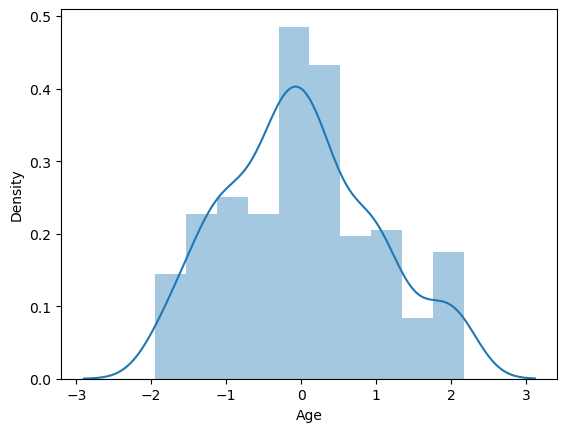

In [257]:
sns.distplot(sf["Age"])

C:\Users\HP\AppData\Local\Temp\ipykernel_4560\2709887266.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sf["EstimatedSalary"])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

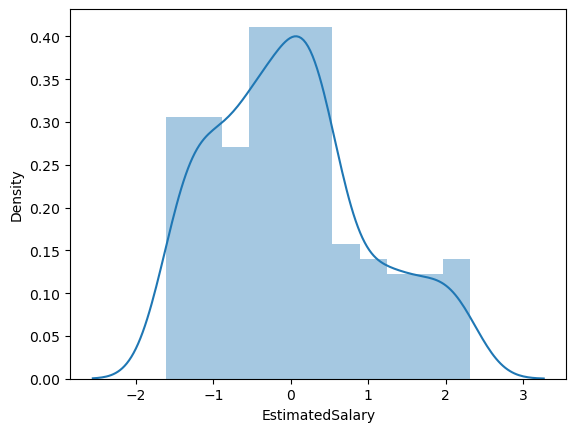

In [256]:
sns.distplot(sf["EstimatedSalary"])

<Axes: >

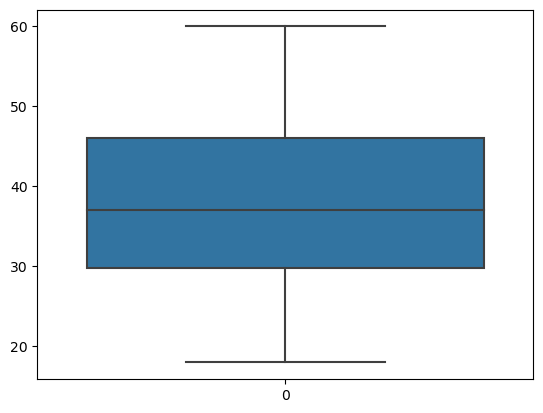

In [253]:
sns.boxplot(n["Age"])

<Axes: >

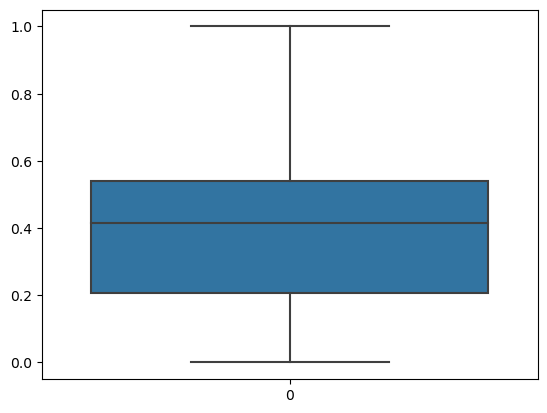

In [252]:
sns.boxplot(mf["EstimatedSalary"])

<Axes: xlabel='Age', ylabel='Density'>

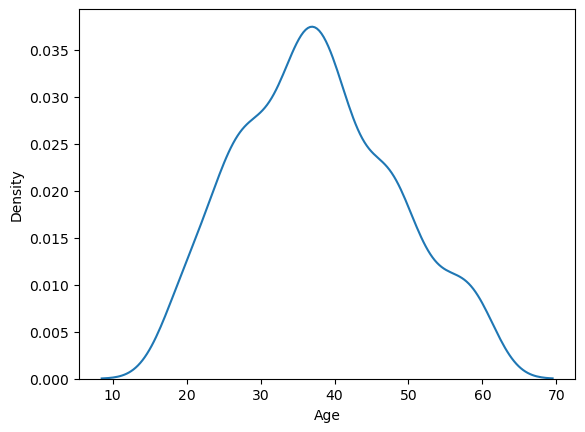

In [251]:
sns.kdeplot(n["Age"])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

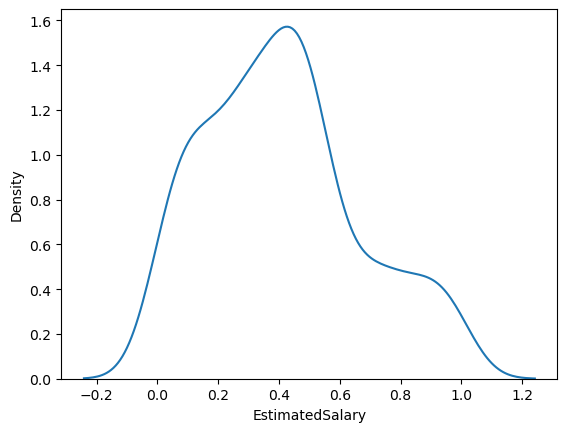

In [249]:
sns.kdeplot(mf["EstimatedSalary"])

# wine DataSet

In [258]:
w.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
